In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt

In [3]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/Offshore/ais_oregon_self_offshore_V1.csv',sep = ',')
path_to_write='E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/Benchmark_data/'
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')


In [4]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration,fmin=10,fmax=90,get_acoustic=True,get_spectrogram=True):
    if hydrophone_idx==1:
        hydro='Oregon_offshore'
    elif hydrophone_idx==2:
        hydro='Oregon_shelf'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df_oregon(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ships.to_csv(path_to_write+hydro+'/isolated_ships_' + suffix)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    isolated_ais.to_csv(path_to_write+hydro+'/isolated_ais_'+ suffix)
    return isolated_ships,isolated_ais

In [5]:
hydrophone_idx=3
min_duration=20
inner_rad=10
outer_rad=30

In [8]:
ais = fn.choose_df_oregon(df,1)

 Max distance: 86.26 and Min distance: 0.0


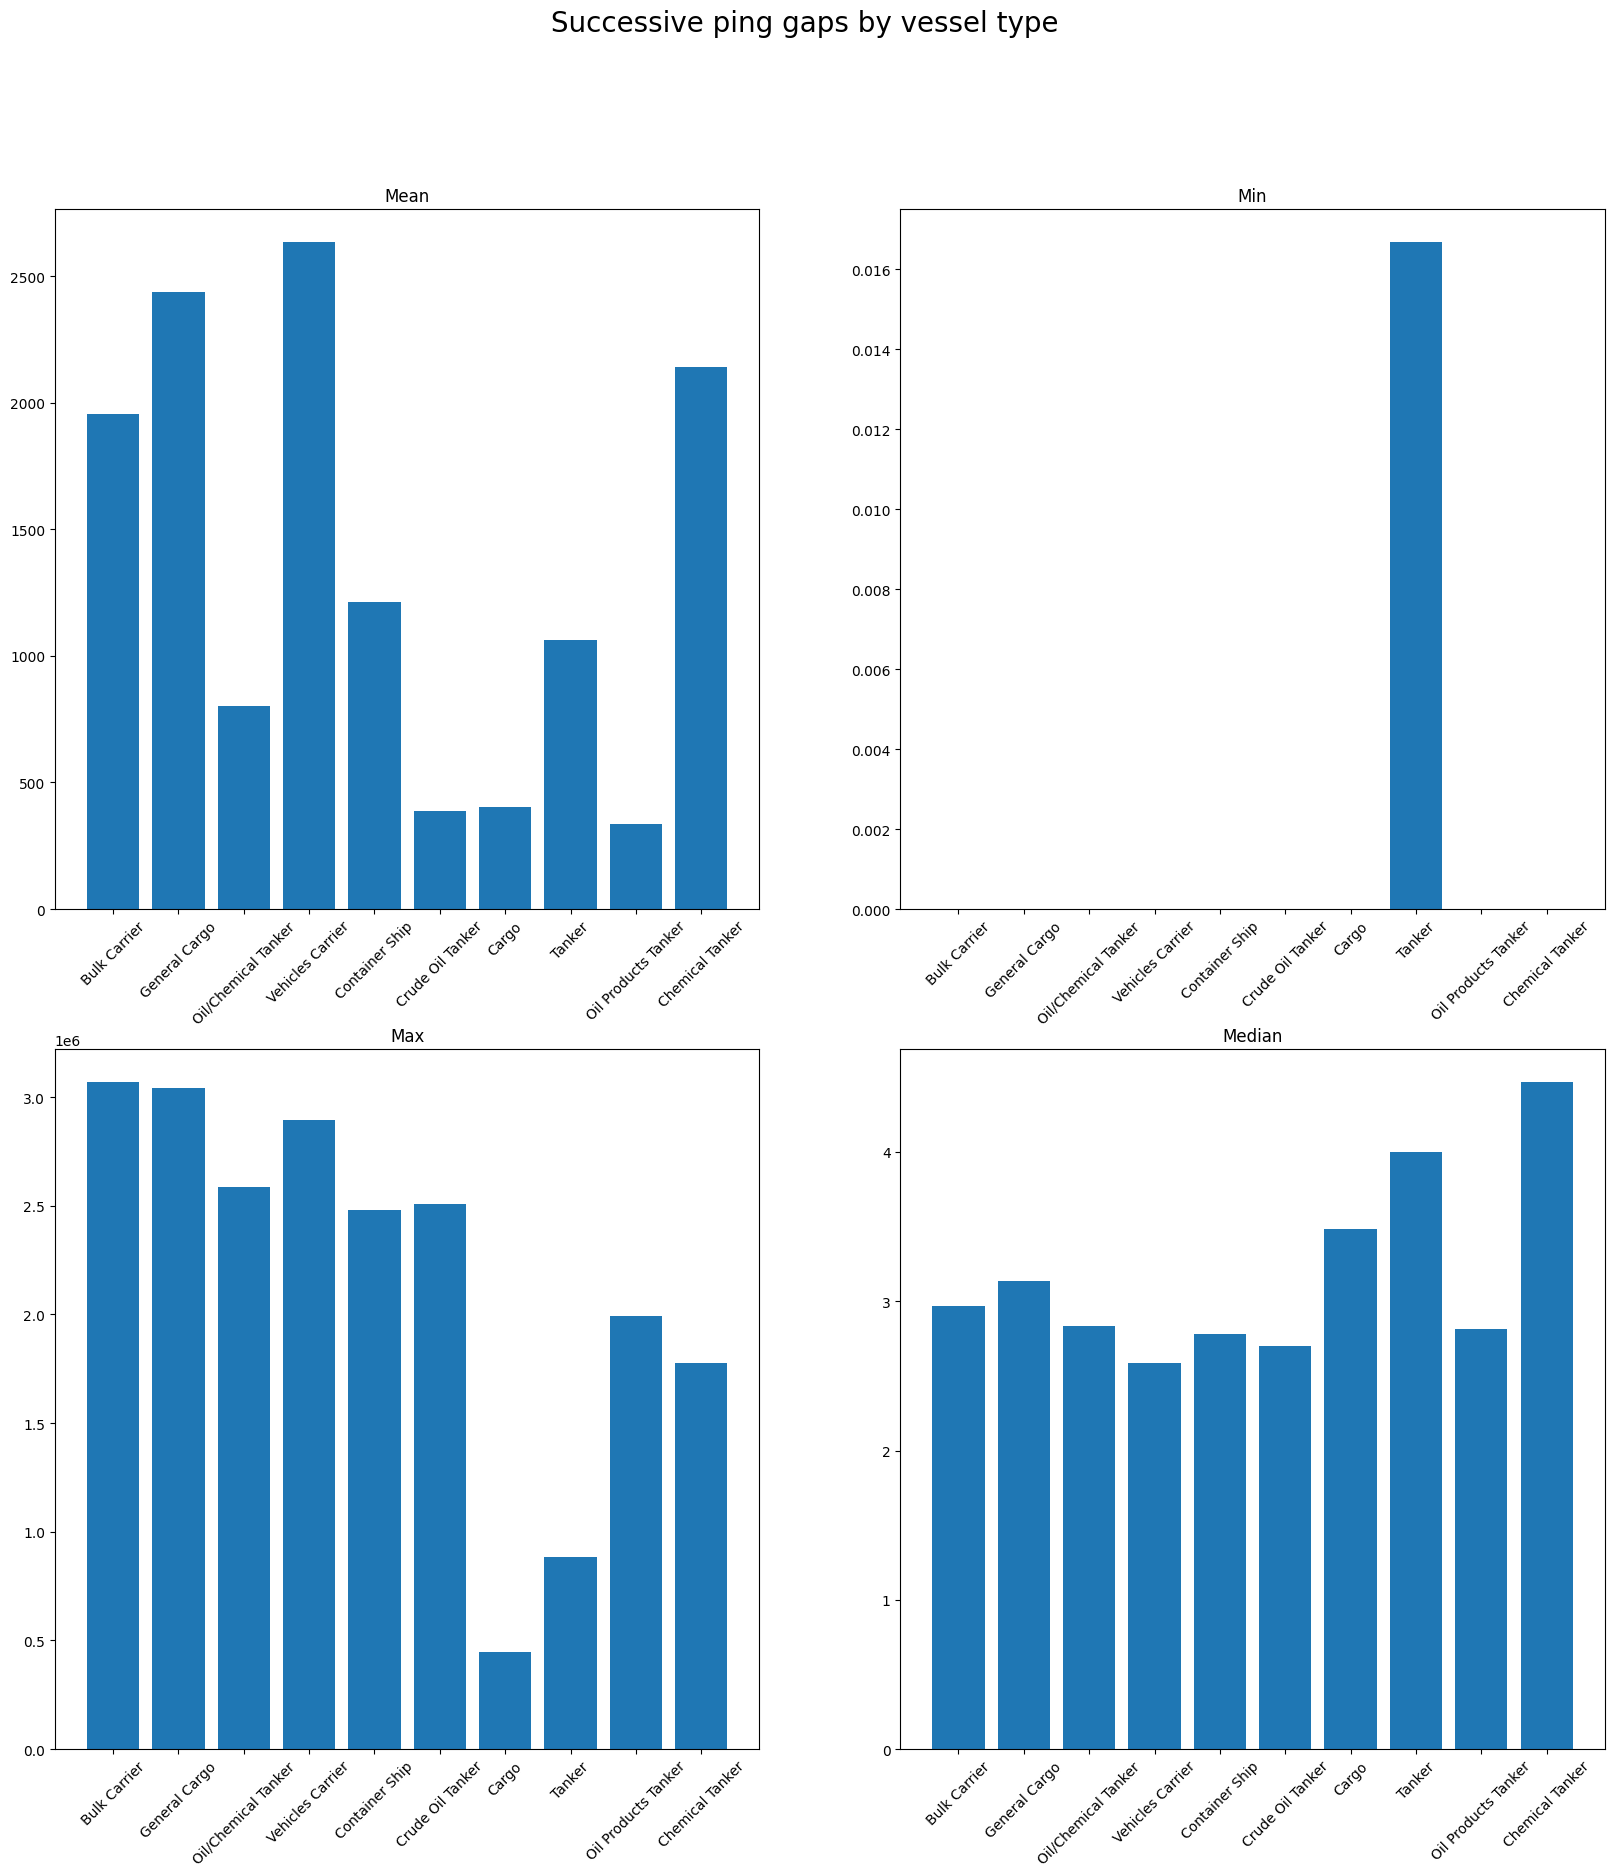

In [9]:

reload(fn)
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')
ships_pings,vessels_pings= fn.ais_ping_distribution(ais,bar_show=True)

In [10]:
vessels_pings[vessels_pings['VESSEL TYPE']== 'Research/Survey Vessel']

,VESSEL TYPE,distinct count ships,mean_ping_time,min_ping_time,max_ping_time,median_ping_time
47,Research/Survey Vessel,19,201.287444,0.0,1.287155e+06,2.716667


In [9]:
   
   
ais_vessel=ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','mean speed','median speed','mean distance']
ais_vessel=ais_vessel.sort_values(by='number ais records',ascending=False)
ais_vessel

,VESSEL TYPE,number ais records,distinct count ships,mean speed,median speed,mean distance
22,Fishing,930634,250,54.531846,64.0,54.354201
23,Fishing Vessel,767677,112,54.845369,60.0,44.713271
68,Trawler,256442,33,58.905873,58.0,35.093107
69,Tug,230431,191,72.918739,72.0,46.524836
56,SAR,196382,36,27.084580,1.0,75.311079
...,...,...,...,...,...,...
25,Heavy Lift Vessel,62,1,112.129032,112.0,22.862097
62,Supply Vessel,60,1,145.183333,145.0,29.200000
1,Barge Carrier,57,1,140.859649,140.0,25.877719
31,Inland Ro-Ro Cargo Ship,41,1,158.707317,158.0,29.050244


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pleasure Craft'),
  Text(1, 0, 'Bulk Carrier'),
  Text(2, 0, 'Sailing Vessel'),
  Text(3, 0, 'Vehicles Carrier'),
  Text(4, 0, 'Fishing'),
  Text(5, 0, 'Tug'),
  Text(6, 0, 'Container Ship'),
  Text(7, 0, 'Unspecified'),
  Text(8, 0, 'General Cargo'),
  Text(9, 0, 'Fishing Vessel')])

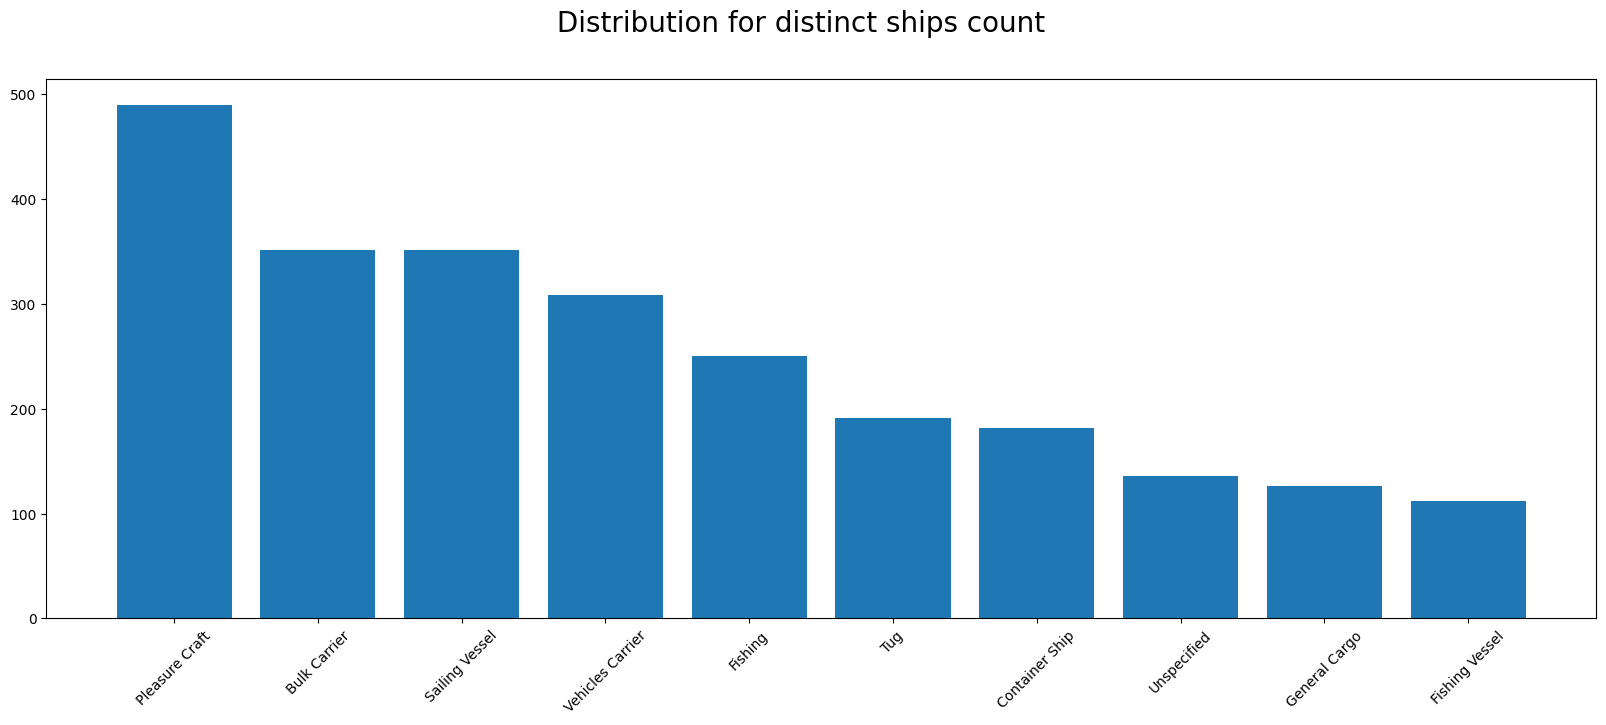

In [10]:
n=10
fig,ax= plt.subplots(1,1,figsize=(20,7))
fig.suptitle(' Distribution for distinct ships count', fontsize=20)
ais_vessel_dist=ais_vessel.sort_values(by='distinct count ships',ascending=False)
plt.bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
plt.xticks(rotation = 45)


### EDA for isolated ships

In [12]:
hydrophone_idx=1
min_duration=10
inner_rad=10
outer_rad=30
isolated_ships, isolated_ais=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 86.26 and Min distance: 0.0


100%|██████████████████████████████████████████████████████████████████████████████| 2462/2462 [02:28<00:00, 16.59it/s]


In [13]:
isolated_ais.head()

,MMSI,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_offshore_Loc,isolated_ship_idx
3271586,209218000,Bulk Carrier,123,178,179,2020-04-07 04:35:12,171.6,"(44.42622, -125.0272)",44.42622,-125.0272,8.59,"(44.3695, -124.954)",0
3271591,209218000,Bulk Carrier,123,177,179,2020-04-07 04:39:53,171.6,"(44.41027, -125.0269)",44.41027,-125.0269,7.37,"(44.3695, -124.954)",0
3271594,209218000,Bulk Carrier,124,179,177,2020-04-07 04:46:02,171.6,"(44.38904, -125.0259)",44.38904,-125.0259,6.13,"(44.3695, -124.954)",0
3271598,209218000,Bulk Carrier,125,178,178,2020-04-07 04:49:14,171.6,"(44.37808, -125.0255)",44.37808,-125.0255,5.78,"(44.3695, -124.954)",0
3271600,209218000,Bulk Carrier,125,180,178,2020-04-07 04:51:31,171.6,"(44.37007, -125.0253)",44.37007,-125.0253,5.68,"(44.3695, -124.954)",0


In [14]:
isolated_ais[isolated_ais['isolated_ship_idx']==104]


,MMSI,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_offshore_Loc,isolated_ship_idx
3224487,255805859,Container Ship,121,354,355,2020-06-15 01:42:21,299.92,"(44.30797, -125.0287)",44.30797,-125.0287,9.07,"(44.3695, -124.954)",104
3224495,255805859,Container Ship,120,356,355,2020-06-15 01:50:19,299.92,"(44.33465, -125.0314)",44.33465,-125.0314,7.29,"(44.3695, -124.954)",104
3224501,255805859,Container Ship,120,355,354,2020-06-15 01:52:29,299.92,"(44.34182, -125.032)",44.34182,-125.0320,6.94,"(44.3695, -124.954)",104
3224504,255805859,Container Ship,120,356,354,2020-06-15 01:54:29,299.92,"(44.34848, -125.0327)",44.34848,-125.0327,6.69,"(44.3695, -124.954)",104
3224507,255805859,Container Ship,121,354,354,2020-06-15 01:56:29,299.92,"(44.35523, -125.0333)",44.35523,-125.0333,6.52,"(44.3695, -124.954)",104
3224510,255805859,Container Ship,123,357,355,2020-06-15 02:00:31,299.92,"(44.36875, -125.0347)",44.36875,-125.0347,6.43,"(44.3695, -124.954)",104
3224514,255805859,Container Ship,125,356,354,2020-06-15 02:03:40,299.92,"(44.37954, -125.0357)",44.37954,-125.0357,6.61,"(44.3695, -124.954)",104
3224516,255805859,Container Ship,125,356,354,2020-06-15 02:06:00,299.92,"(44.38759, -125.0363)",44.38759,-125.0363,6.86,"(44.3695, -124.954)",104
3224520,255805859,Container Ship,126,357,354,2020-06-15 02:08:49,299.92,"(44.39749, -125.0371)",44.39749,-125.0371,7.32,"(44.3695, -124.954)",104
3224526,255805859,Container Ship,125,356,354,2020-06-15 02:11:29,299.92,"(44.40714, -125.0378)",44.40714,-125.0378,7.88,"(44.3695, -124.954)",104


In [15]:
temp=ais[(ais['TIMESTAMP UTC']>='2015-07-08 18:49:13') & (ais['TIMESTAMP UTC']<='2015-07-08 19:10:20') & (ais['distance(in km)']<inner_rad)]
temp

,MMSI,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,ship_Loc,LAT,LON,distance(in km),oregon_offshore_Loc


In [16]:
def isolated_ships_describe(isolated_ships, isolated_ais):
    ais_vessel=isolated_ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'isolated_ship_idx':pd.Series.nunique,'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
    ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','distinct instances','mean speed','median speed','mean distance']
    ais_vessel=ais_vessel.sort_values(by='distinct count ships',ascending=False)
    isolated_vessel=isolated_ships.groupby(by=['VESSEL TYPE']).agg({'len_of_recording':['mean','median']}).reset_index()
    isolated_vessel.columns=['VESSEL TYPE','mean len_of_recording','median len_of_recording']
    df_final=ais_vessel.merge(isolated_vessel,how='left',on='VESSEL TYPE')
    return df_final





In [17]:

vessel_summary=isolated_ships_describe(isolated_ships, isolated_ais)
vessel_summary

,VESSEL TYPE,number ais records,distinct count ships,distinct instances,mean speed,median speed,mean distance,mean len_of_recording,median len_of_recording
0,Vehicles Carrier,1738,99,149,147.443613,149.0,7.084102,28.363480,28.450000
1,Container Ship,3602,83,336,143.480844,145.0,7.383878,26.069940,25.608333
2,Bulk Carrier,871,61,77,112.198622,118.0,7.216131,31.696753,31.333333
3,Tug,1068,53,101,75.740637,72.5,6.475365,44.999158,43.000000
4,Fishing,5515,36,397,31.295014,23.0,7.534091,60.848567,27.841667
5,Fishing Vessel,5183,29,421,43.519004,34.0,8.297254,41.990382,23.816667
6,General Cargo,407,28,37,109.641278,123.0,7.678231,27.651802,25.666667
7,Pleasure Craft,202,22,26,101.752475,100.5,6.665495,34.421605,32.966667
8,Oil/Chemical Tanker,282,21,23,121.595745,123.5,7.456348,30.706061,34.641667
9,Unspecified,470,17,46,51.261702,34.0,7.850043,58.811321,27.833333


Text(0.5, 1.0, 'distinct instances')

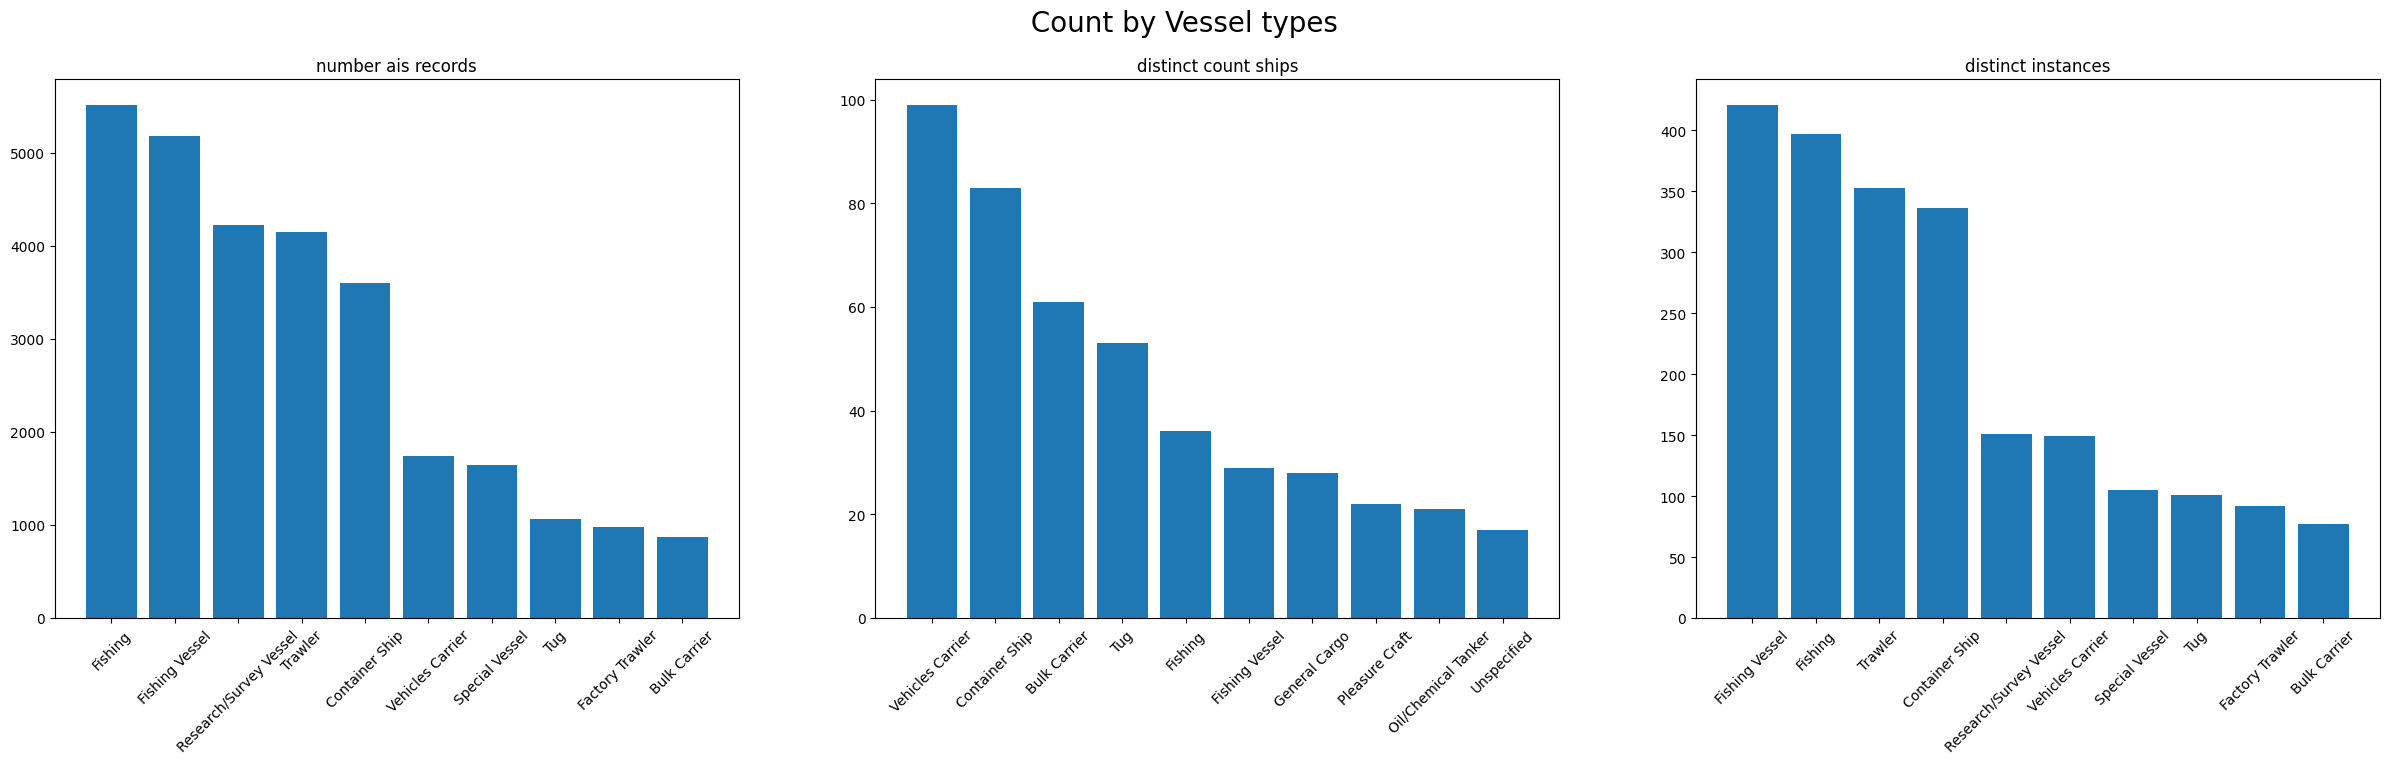

In [19]:
n=10
fig,ax= plt.subplots(1,3,figsize=(30,7))
fig.suptitle(' Count by Vessel types', fontsize=20)
ais_vessel_dist=vessel_summary.sort_values(by='number ais records',ascending=False)
ax[0].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['number ais records'].iloc[:n])
ax[0].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[0].set_title('number ais records')
ais_vessel_dist=vessel_summary.sort_values(by='distinct count ships',ascending=False)
ax[1].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
ax[1].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[1].set_title('distinct count ships')
ais_vessel_dist=vessel_summary.sort_values(by='distinct instances',ascending=False)
ax[2].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct instances'].iloc[:n])
ax[2].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[2].set_title('distinct instances')
